In [1]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,Activation,MaxPooling2D
from keras.models import Sequential
from keras.models import load_model
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (100,100)  
train_path = 'Data/train'

for foldername in os.listdir(train_path):
    for filename in os.listdir(train_path+"/"+foldername):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(train_path+"/"+foldername,filename))
            try:
                # Resize all images to a specific shape
                img = cv2.resize(img,shape)
                
                # Spliting file names and storing the labels for image in list
                train_labels.append(foldername)

                train_images.append(img)
            except:
                pass
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

no_of_classes = len(train_labels[0])        

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [3]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
test_path = 'Data/test'

for foldername in os.listdir(test_path):
    for filename in os.listdir(test_path+"/"+foldername):
        if filename.split('.')[1] == 'jpg':
            img = cv2.imread(os.path.join(test_path+"/"+foldername,filename))

            # Spliting file names and storing the labels for image in list
            test_labels.append(foldername)

            # Resize all images to a specific shape
            img = cv2.resize(img,shape)

            test_images.append(img)
# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0 0 0]


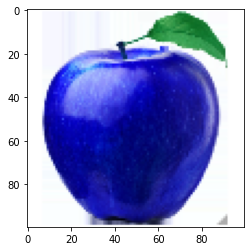

In [4]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

In [5]:
def show_image(index):
    print(train_labels[index])
    #plt.imshow(test_images[index])
    cv2.imshow('win',train_images[index])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
#show_image(7)

[1 0 0 0 0 0]


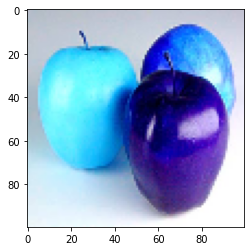

In [6]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(train_images[4])

In [7]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 32, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(no_of_classes,activation = 'softmax'))


In [8]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

## Training takes 10 minutes     Hold your horses!!!!!

In [9]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
# fitting model using above defined layers 
CNN_model = model.fit(x_train,y_train,epochs=30,batch_size=50,validation_data=(x_val,y_val),
        verbose=2, shuffle=True)

Epoch 1/30
28/28 - 18s - loss: 10.7505 - accuracy: 0.2941 - val_loss: 1.1746 - val_accuracy: 0.5468
Epoch 2/30
28/28 - 16s - loss: 1.0171 - accuracy: 0.5788 - val_loss: 0.6045 - val_accuracy: 0.8497
Epoch 3/30
28/28 - 17s - loss: 0.6523 - accuracy: 0.7553 - val_loss: 0.2925 - val_accuracy: 0.9172
Epoch 4/30
28/28 - 15s - loss: 0.4126 - accuracy: 0.8497 - val_loss: 0.1924 - val_accuracy: 0.9586
Epoch 5/30
28/28 - 15s - loss: 0.2887 - accuracy: 0.8976 - val_loss: 0.1575 - val_accuracy: 0.9760
Epoch 6/30
28/28 - 15s - loss: 0.1974 - accuracy: 0.9354 - val_loss: 0.1318 - val_accuracy: 0.9847
Epoch 7/30
28/28 - 18s - loss: 0.1905 - accuracy: 0.9303 - val_loss: 0.0776 - val_accuracy: 0.9847
Epoch 8/30
28/28 - 17s - loss: 0.1326 - accuracy: 0.9601 - val_loss: 0.0933 - val_accuracy: 0.9869
Epoch 9/30
28/28 - 15s - loss: 0.0888 - accuracy: 0.9731 - val_loss: 0.1017 - val_accuracy: 0.9826
Epoch 10/30
28/28 - 15s - loss: 0.1016 - accuracy: 0.9622 - val_loss: 0.1320 - val_accuracy: 0.9760
Epoch 11

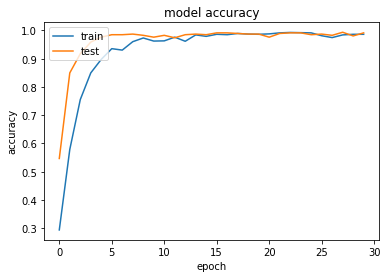

In [11]:
# summarize history for accuracy
plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

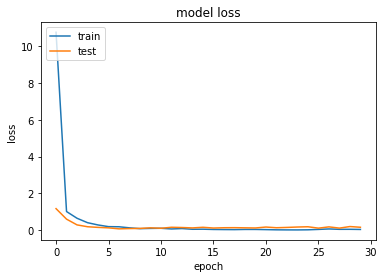

In [12]:
# summarize history for loss
plt.plot(CNN_model.history['loss'])
plt.plot(CNN_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
#Saving the model
model.save('newmodel.h5')
model.save('FoodApp/newmodel.h5')

#loss: 0.0928 - acc: 0.9333 - val_loss: 0.7667 - val_acc: 0.8333


In [14]:
#Loading the model
model = load_model('newmodel.h5')
history  = CNN_model

In [15]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

15/15 [==============================] - 1s 90ms/step - loss: 0.1641 - accuracy: 0.9913
[0.16405504941940308, 0.9912853837013245]


In [16]:
output = { 0:'apple',1:'banana',2:'kiwi',3:'lemon',4:'orange'}


In [17]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))


print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['apple']
Predicted :-  apple


# Testing by Ramkishor

In [18]:
def show_image(index):
    print(test_labels[index])
    #plt.imshow(test_images[index])
    cv2.imshow('win',test_images[index])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [19]:
# Testing predictions and the actual label
def test(index):
    checkImage = test_images[index:index+1]
    checklabel = test_labels[index:index+1]

    predict = model.predict(np.array(checkImage))

    #print("Actual :- ",checklabel)
    #print("Predicted :- ",output[np.argmax(predict)])
    
    return checklabel,output[np.argmax(predict)]
    #show_image(index)


In [20]:
correct_count = 0
incorrect_count = 0
for i in range(10,len(test_images)):
    Actual,Predicted = test(i)

    
    if Actual[0] == Predicted:
        correct_count+=1
        #print(f"{Actual[0]} is predicted as {Predicted}")
        #show_image(i)
    else:
        incorrect_count+=1
        #print(f"{Actual[0]} is predicted as {Predicted}")
        #show_image(i)
print()
print(f"correct_count = {correct_count}")
print(f"incorrect_count = {incorrect_count}")

KeyError: 5

In [ ]:
NewTestPath = 'Data/NewTestData'
my_test_images=[]
my_test_labels=[]

for filename in os.listdir(NewTestPath):
        img = cv2.imread(os.path.join(NewTestPath,filename))
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
                
        # Spliting file names and storing the labels for image in list
        my_test_labels.append(filename.split('_')[0])
        

        my_test_images.append(img)


def test(index):
    checkImage = my_test_images[index:index+1]
    Actual = my_test_labels[index]
    predict = model.predict(np.array(checkImage))

    #print("Actual :- ",checklabel)
    #print("Predicted :- ",output[np.argmax(predict)])
    
    return Actual,output[np.argmax(predict)]
    #show_image(index)
def show_image(index):
    #plt.imshow(test_images[index])
    cv2.imshow('win',my_test_images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()


for i in range(len(my_test_images)):
    Actual,Predicted = test(i)
    print(f"{Actual} is predicted as {Predicted}")
    #show_image(i)